In [1]:
# 这部分代码是用来设置一些绘图的参数和导入必要的库，每次启动内核时都需要运行
import matplotlib.colors as mcolors
import matplotlib.animation as ma
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from itertools import product
import pandas as pd
import numpy as np
import numba as nb
import imageio
import os
import shutil

randomSeed = 100

%matplotlib inline
%config InlineBackend.figure_format = "retina"

new_cmap = mcolors.LinearSegmentedColormap.from_list(
    "new", plt.cm.jet(np.linspace(0, 1, 256)) * 0.85, N=256
)

@nb.njit
def colors_idx(phaseTheta):
    return np.floor(256 - phaseTheta / (2 * np.pi) * 256).astype(np.int32)

import seaborn as sns

sns.set_theme(
    style="ticks", 
    font_scale=1.1, rc={
    'figure.figsize': (6, 5),
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'grid.color': '#dddddd',
    'grid.linewidth': 0.5,
    "lines.linewidth": 1.5,
    'text.color': '#000000',
    'figure.titleweight': "bold",
    'xtick.color': '#000000',
    'ytick.color': '#000000'
})

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

from main import *
from multiprocessing import Pool
import pandas as pd

# colors = ["#403990", "#80A6E2", "#FBDD85", "#F46F43", "#CF3D3E"]
# cmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors)

colors = ["#403990", "#80A6E2", "#FBDD85", "#F46F43", "#CF3D3E"]
cmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors)
cmap_r = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors[::-1])

SAVE_PATH = r"./data"

In [4]:
# 这里是一个模型的实例, 可以调整不同的参数多跑跑看
model = ChiralActiveMatterNonreciprocalReact(
    strengthLambda=0.95,   # 耦合强度 lambda
    distanceD1Mean=2,      # 正手性的平均耦合距离 D1
    distanceD1Std=0.5,     # 正手性的耦合距离均匀分布的宽度 D1_std
    distanceD2Mean=2,      # 负手性的平均耦合距离 D2
    distanceD2Std=0.5,     # 负手性的耦合距离均匀分布的宽度 D2_std
    chiralNum=1,           # 手性数, 只能是1或者2, 当取1时系统内只有正手性粒子, 取2时系统内有正手性和负手性粒子
    savePath=SAVE_PATH,    # 保存路径
    overWrite=True         # 是否覆盖已有缓存
)
# 当均匀分布的宽度为0时, 代表粒子之间的距离是固定的, 也就是D1和D2都是常数

In [6]:
# 这里是模型的计算执行函数，输入的参数是模型的迭代次数(演化时间), 运行完毕后会在data文件夹下生成对应的数据文件
# 完整运行一次生成缓存数据后，下次可以直接读取数据文件，不用再次运行模型
model.run(60000)

In [3]:
# 这里是模型的可视化函数，用于生成动画，输入的参数是模型的实例，运行完毕后会在当文件夹mp4下生成一个mp4文件
# 注意这里的模型实例必须是已经执行过计算的(即已经run过，在data文件夹中有模型的数据文件, 而run过的模型不用重复run)
draw_mp4(model)

  0%|          | 0/15 [00:00<?, ?it/s]

./data/ChiralActiveMatterNonreciprocalReact_1_uniform_uniform_0.950_2.00_0.50_2.00_0.50_10.h5


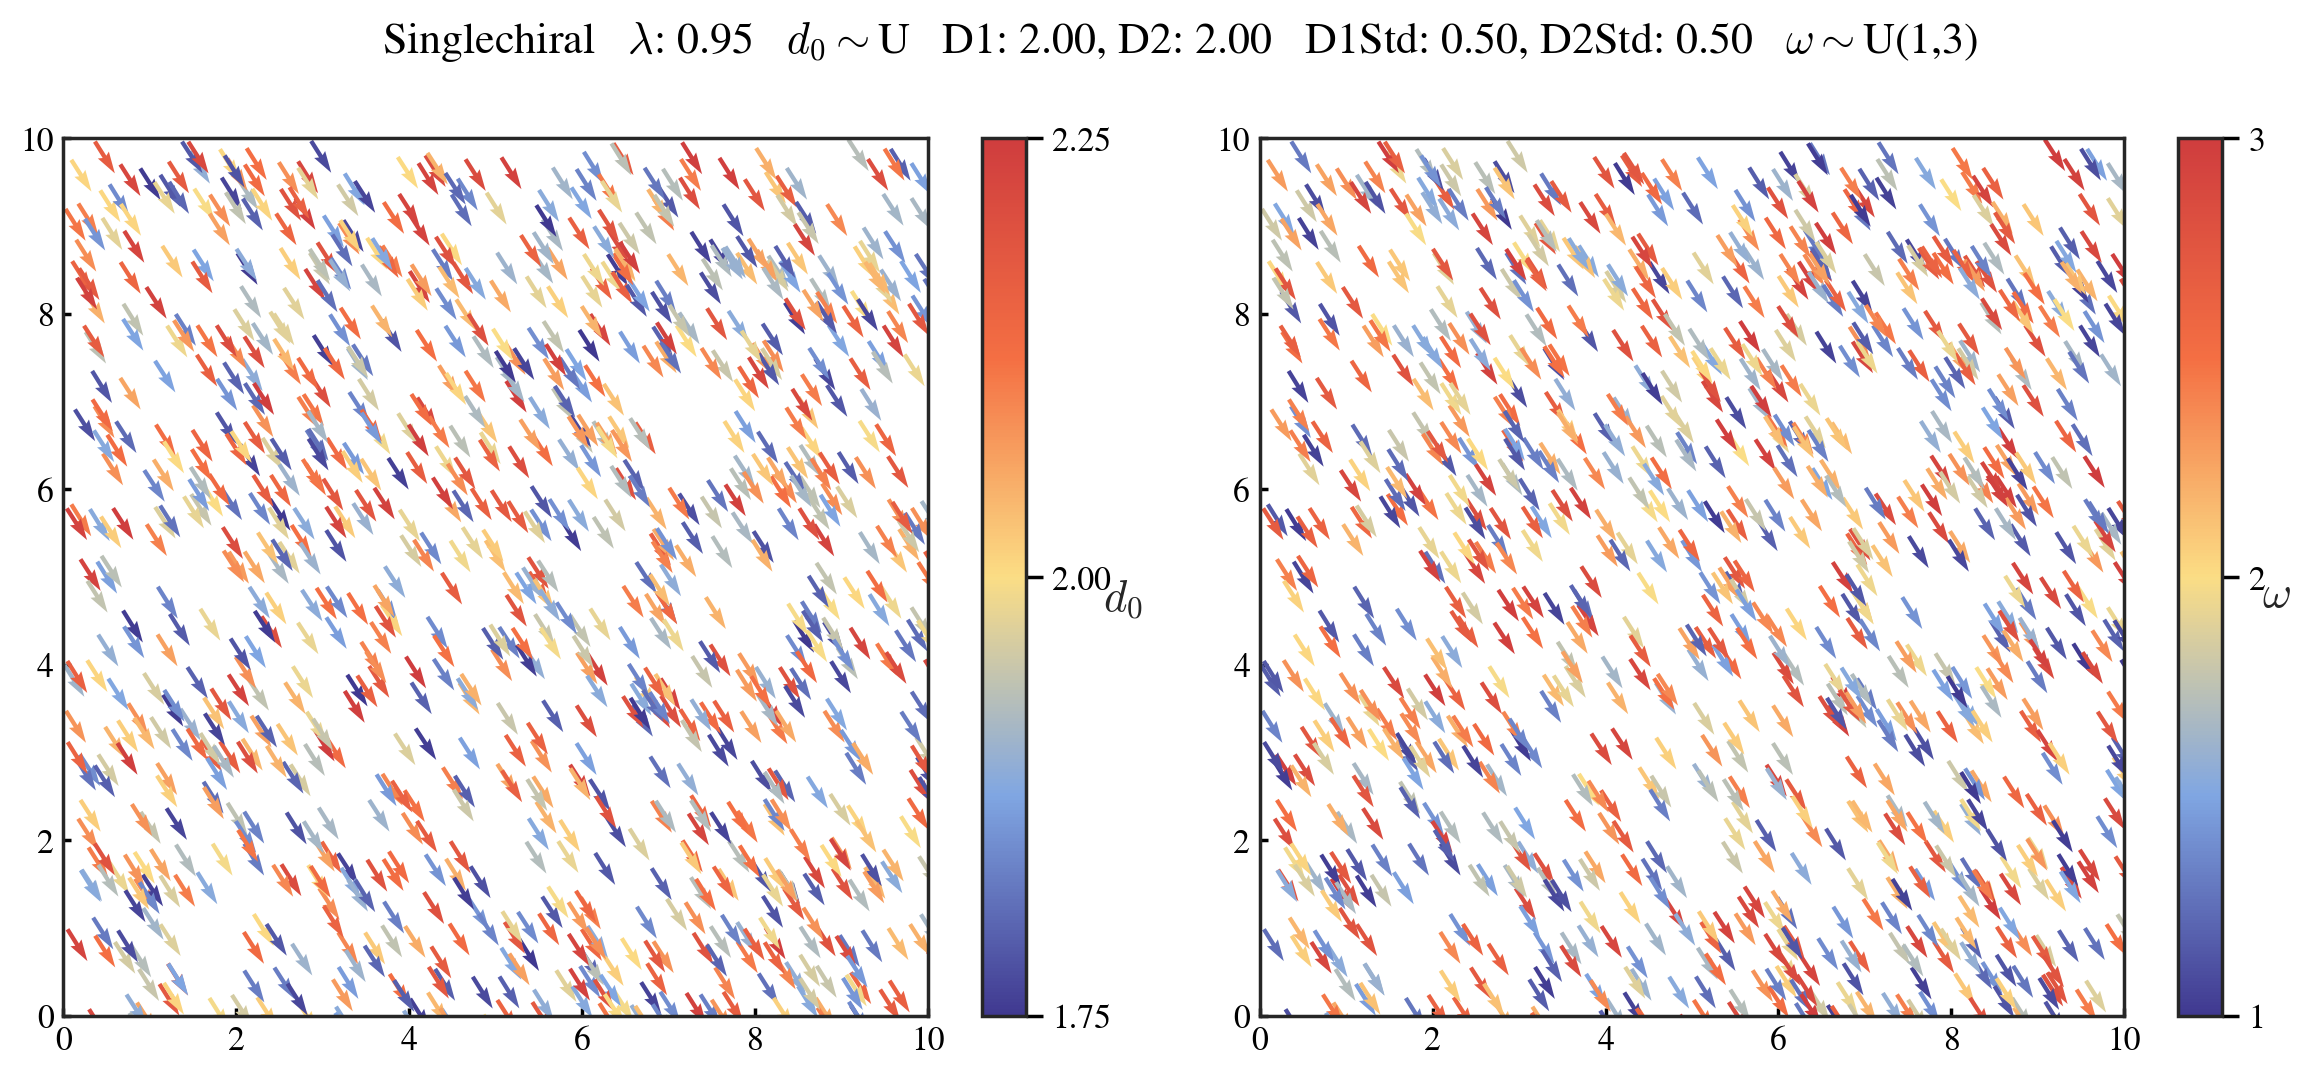

In [8]:
# 该函数用于生成模型跑到终态(最后一帧)时的空间分布图, 同时会将图片保存到当前目录下的fig文件夹中
# 注意这里的模型实例必须是已经执行过计算的(即已经model.run过，在data文件夹中有模型的数据文件, 而run过的模型不用重复run)
plot_last(model)
# 左右两张图分别表示了具有不同耦合距离、自然频率的粒子在空间分布的差异
# 左图的颜色对应colorbar的值是粒子的耦合距离D1和D2, 右图的颜色对应colorbar的值是粒子的自然频率omega